The David C. Knill and Alexandre Pouget paper from 2004 (https://gwern.net/doc/statistics/bayes/2004-knill.pdf) mentions that the weighted sum of the distributions of a variable from separate cues (like visual and auditory), where the weights are inversely proportional to the variances of the respective input distributions, results in a distribution that is "biased" towards the input distribution that has less variance. <br>

Then, they mention that Bayes Theorem implicitly does this biasing. That is, the posterior is more biased towards the "component" (likelihood or prior) that has less variance. <br>

I am checking this via code here using normal distribution. Will be good to check out the theoretical reasons too!

In [149]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt

The normal distribution PDF.

In [150]:
def normal_dist(x, sd, mean):
    return (1 / np.sqrt(2 * np.pi * sd**2)) * np.exp(- (x - mean)**2 / (2 * sd**2))

Explicitly doing weighted sum. <br> <br>
Check the top answer in the following link to see the formula for mean and variance of the weighted sum of two normal distributions: <br>
https://math.stackexchange.com/questions/4913390/if-sums-of-normal-distributions-are-normal-why-are-the-weighted-sums-of-normal

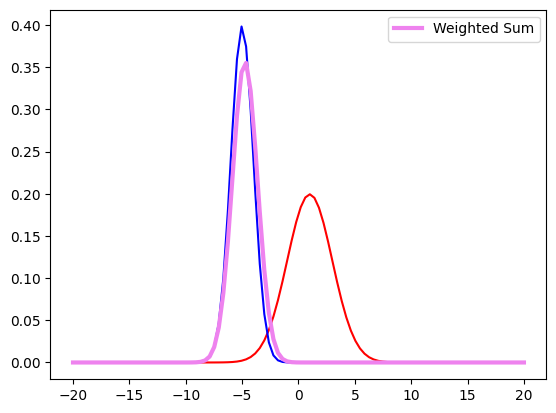

In [151]:
x = np.linspace(-20, 20, 100)

plt.plot(x, normal_dist(x, 2, 1), color = 'red') 
plt.plot(x, normal_dist(x, 1, -5), color = 'blue')

# Weights are proportional to the inverses of the respective variances.
w_1 = 1 / (2**2)
w_2 = 1 / (1**2)

weighted_mean = w_1 * 1 + w_2 * (-5)
weighted_sd = np.sqrt((w_1 * 2)**2 + (w_2 * 1)**2)

# This will be biased towards the distribution with lower SD. 
plt.plot(x, normal_dist(x, weighted_sd, weighted_mean), color = 'violet', linewidth = 3.0, label = 'Weighted Sum')

plt.legend()
plt.show()

For p(cue|variable): <br>

mean(variable) = 5 + 6 * variable <br>
SD(variable) = 2 + 3 * variable^2 <br>

Have chosen an SD function which will output SDs that are higher than the SD of the prior (which is 1) <br>
no matter what value you set for the variable. Therefore, no matter the value of the variable, the posterior<br>
will be biased towards the prior. 

I am using scipy's "integrate" function for calculating the marginal. 

In [152]:
# normal_dist(cue, 2 + 3 * vari**2, 5 + 6 * var) = p(cue|variable)
# normal_dist(vari, sd_prior, mean_prior) = p(variable)
def conditional(vari, cue, sd_prior, mean_prior):
    return normal_dist(cue, 2 + 3 * vari**2, 5 + 6 * vari) * normal_dist(vari, sd_prior, mean_prior)

# marginal = -∞∫∞ p(cue|variable) * p(variable) * d(variable)
def marginal(cue, sd_prior, mean_prior):
    return integrate.quad(conditional, -np.inf, np.inf, args = (cue, sd_prior, mean_prior))[0]

# Applying Bayes theorem for a normal likelihood and a normal prior. 
def posterior(vari, cue, sd_prior, mean_prior):
    return conditional(vari, cue, sd_prior, mean_prior) / marginal(cue, sd_prior, mean_prior) 

Implicitly doing weighted sum via Bayes Theorem. Calculating the posterior basically. 

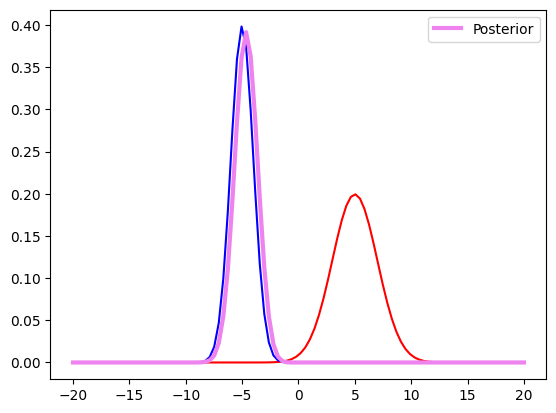

In [153]:
x = np.linspace(-20, 20, 100)

cue = 10 
sample_variable_value = 0 

plt.plot(x, normal_dist(x, 2 + 3 * sample_variable_value**2, 5 + 6 * sample_variable_value), color = 'red') 
plt.plot(x, normal_dist(x, 1, -5), color = 'blue')

# This will be biased towards the distribution with lower SD too. 
plt.plot(x, posterior(x, cue, 1, -5), color = 'violet', linewidth = 3.0, label = 'Posterior')

plt.legend()
plt.show()


As you can see, in both techniques, the resulting distribution is biased towards the input distribution with less variance. The Bayes Theorem approach is more complicated, but the Bayesian approach isn't only used because it has this behavior. It is motivated by other stuff too. 